# 0. Import and Parameters

In [1]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# others
from datetime import datetime, timedelta

In [2]:
# Parameters setting
# Features 

# Selection of Time period
# will be used in 3-2
time_start = '2013-01-01T00:00:00'
time_end = '2022-12-31T00:00:00'

drop_columns = ['Today_trend_cate', 'Tomorrow_trend_cate', 'datetime', 'title_sentiment_score', 'Ema_12', 'Sma']

# 1. Import data and merge to one df

## (1) Import data

In [3]:
sentiment_df = pd.read_csv('data\processed_sentiment_variable.csv')
tech_df = pd.read_csv('data\processed_technical_indicator.csv')

In [4]:
print('preview of sentiment_df:')
sentiment_df

preview of sentiment_df:


,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment,datetime
0,-0.947225,-7.077602,-16.404664,2011-09-30
1,0.519091,0.000000,0.000000,2011-10-05
2,-0.911413,-5.141673,-17.316077,2011-10-07
3,-0.963791,-0.963791,0.000000,2011-11-03
4,-0.946353,-1.910143,0.000000,2011-11-04
...,...,...,...,...
657,-1.912174,-9.327062,-11.796896,2023-01-24
658,-2.847341,-12.174403,-13.810890,2023-01-25
659,-2.560856,-15.458993,-15.411840,2023-01-26
660,-0.023535,-12.655522,-15.435375,2023-01-27


In [5]:
print('preview of tech_df:')
tech_df

preview of tech_df:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Today_trend,Today_trend_cate,Tomorrow_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime
0,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0,0.005404,1,0.002161,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13
1,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0,0.002161,1,0.001081,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14
2,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0,0.001081,1,-0.001622,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17
3,0.063767,0.064308,0.061605,0.062145,67766400,0.0,0.0,-0.001622,0,-0.001081,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18
4,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0,-0.001081,0,-0.001621,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,320.029999,322.720001,315.250000,315.260010,30797200,0.0,0.0,-4.769989,0,-1.410004,0,311.823327,51.597375,62.666109,270.942262,245.613537,25.328725,2023-05-23
9375,314.730011,316.500000,312.609985,313.850006,23384900,0.0,0.0,-0.880005,0,12.070007,1,312.473770,51.525859,53.593541,271.450046,245.800743,25.649303,2023-05-24
9376,323.239990,326.899994,320.000000,325.920013,43301700,0.0,0.0,2.680023,1,6.970001,1,313.612887,51.698316,95.437211,272.094661,246.020549,26.074112,2023-05-25
9377,324.019989,333.399994,323.880005,332.890015,36600900,0.0,0.0,8.870026,1,-1.680023,0,315.392406,52.175930,98.166073,272.814132,246.258874,26.555259,2023-05-26


## (2) Merge 2 kinds of data to one dataframe

In [6]:
df_merge = pd.merge(tech_df, sentiment_df, on='datetime', how='left')

In [7]:
print("Columns(features): ", '\n', df_merge.columns)
print("\n")
print("Shape: ", df_merge.shape)

Columns(features):  
 Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Today_trend', 'Today_trend_cate', 'Tomorrow_trend',
       'Tomorrow_trend_cate', 'Sma', 'Rsi', 'Kd', 'Ema_12', 'Ema_26', 'Macd',
       'datetime', 'title_sentiment_score', 'title_midterm_sentiment',
       'title_longterm_sentiment'],
      dtype='object')


Shape:  (9379, 21)


# 2. Feature Engineering

Still doing this part, must check out before training

## (1) Correlation Matrix

Correaltion Matrix: 
                              Open      High       Low     Close    Volume  \
Open                      1.000000  0.999939  0.999932  0.999853 -0.324088   
High                      0.999939  1.000000  0.999909  0.999927 -0.322945   
Low                       0.999932  0.999909  1.000000  0.999930 -0.325359   
Close                     0.999853  0.999927  0.999930  1.000000 -0.324224   
Volume                   -0.324088 -0.322945 -0.325359 -0.324224  1.000000   
Dividends                 0.062818  0.062541  0.062943  0.062658 -0.023846   
Stock Splits             -0.015322 -0.015282 -0.015344 -0.015253  0.013723   
Today_trend               0.015496  0.023390  0.023956  0.032614 -0.015720   
Today_trend_cate          0.001412  0.004391  0.004846  0.008003 -0.019796   
Tomorrow_trend            0.030605  0.030345  0.030203  0.028868 -0.010390   
Tomorrow_trend_cate      -0.005784 -0.005902 -0.005905 -0.006248  0.000581   
Sma                       0.999369  0.99940

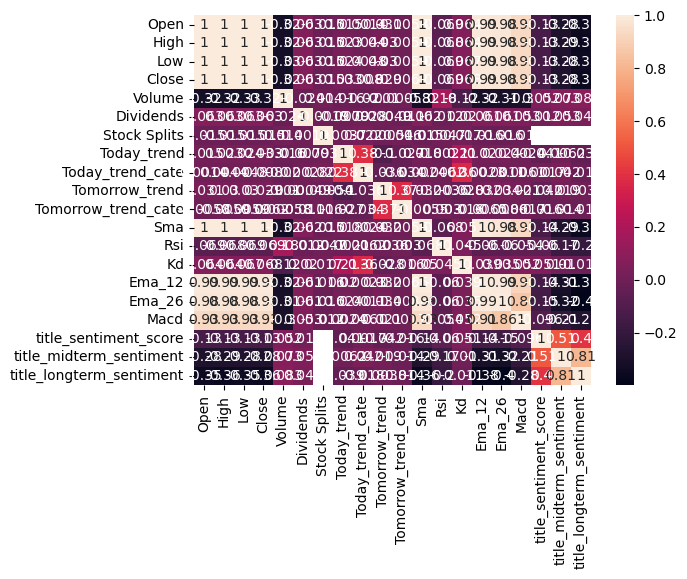

In [8]:
corr = df_merge.corr()

print("Correaltion Matrix: ")
print(corr)

sn.heatmap(corr, annot=True)
plt.show()

## (3) Drop useless columns

In [9]:
# Check the columns again in order to choose drop_columns
df_merge.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Today_trend', 'Today_trend_cate', 'Tomorrow_trend',
       'Tomorrow_trend_cate', 'Sma', 'Rsi', 'Kd', 'Ema_12', 'Ema_26', 'Macd',
       'datetime', 'title_sentiment_score', 'title_midterm_sentiment',
       'title_longterm_sentiment'],
      dtype='object')

In [10]:
df_merge

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Today_trend,Today_trend_cate,Tomorrow_trend,...,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
0,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0,0.005404,1,0.002161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13,NaN,NaN,NaN
1,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0,0.002161,1,0.001081,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14,NaN,NaN,NaN
2,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0,0.001081,1,-0.001622,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17,NaN,NaN,NaN
3,0.063767,0.064308,0.061605,0.062145,67766400,0.0,0.0,-0.001622,0,-0.001081,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18,NaN,NaN,NaN
4,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0,-0.001081,0,-0.001621,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,320.029999,322.720001,315.250000,315.260010,30797200,0.0,0.0,-4.769989,0,-1.410004,...,311.823327,51.597375,62.666109,270.942262,245.613537,25.328725,2023-05-23,NaN,NaN,NaN
9375,314.730011,316.500000,312.609985,313.850006,23384900,0.0,0.0,-0.880005,0,12.070007,...,312.473770,51.525859,53.593541,271.450046,245.800743,25.649303,2023-05-24,NaN,NaN,NaN
9376,323.239990,326.899994,320.000000,325.920013,43301700,0.0,0.0,2.680023,1,6.970001,...,313.612887,51.698316,95.437211,272.094661,246.020549,26.074112,2023-05-25,NaN,NaN,NaN
9377,324.019989,333.399994,323.880005,332.890015,36600900,0.0,0.0,8.870026,1,-1.680023,...,315.392406,52.175930,98.166073,272.814132,246.258874,26.555259,2023-05-26,NaN,NaN,NaN


In [11]:
### Still considering either way to use

# Drop columns, check the setting above the code (setting in the first part of this file)
# df_merge.drop(columns=drop_columns, inplace=True)
feature = [
    'Today_trend',
    'Tomorrow_trend_cate', 
    'Sma', 
    'Rsi', 
    'Kd', 
    'Ema_12', 
    'Ema_26', 
    'Macd',
    'datetime', 
    'title_sentiment_score', 
    'title_midterm_sentiment',
    'title_longterm_sentiment'
]

df_merge = df_merge[feature]

In [12]:
# Check again after dropping columns
print("Number of features: ", len(df_merge.columns), "\n")
print("Remaining columns: ", df_merge.columns)


Number of features:  12 

Remaining columns:  Index(['Today_trend', 'Tomorrow_trend_cate', 'Sma', 'Rsi', 'Kd', 'Ema_12',
       'Ema_26', 'Macd', 'datetime', 'title_sentiment_score',
       'title_midterm_sentiment', 'title_longterm_sentiment'],
      dtype='object')


# 3. Final Adjustment before training

## (1) Missing value

In [13]:
# Check NaN
df_merge.isnull().sum()

Today_trend                    0
Tomorrow_trend_cate            0
Sma                            0
Rsi                            0
Kd                             0
Ema_12                         0
Ema_26                         0
Macd                           0
datetime                       0
title_sentiment_score       8733
title_midterm_sentiment     8733
title_longterm_sentiment    8733
dtype: int64

In [14]:
# clean up NaN
df_merge.fillna(0, inplace=True)

C:\Users\denne\AppData\Local\Temp\ipykernel_3980\1463313361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.fillna(0, inplace=True)


In [15]:
# Check NaN
df_merge.isnull().sum()

Today_trend                 0
Tomorrow_trend_cate         0
Sma                         0
Rsi                         0
Kd                          0
Ema_12                      0
Ema_26                      0
Macd                        0
datetime                    0
title_sentiment_score       0
title_midterm_sentiment     0
title_longterm_sentiment    0
dtype: int64

## (2) Select the target time period

In [16]:
# We use index to filter for time periods
df_selected_time = df_merge[(df_merge['datetime']> time_start) & (df_merge['datetime'] < time_end)]
df_selected_time

,Today_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
6759,0.303666,0,22.277802,51.256937,91.911328,23.403623,22.056925,1.346699,2013-01-02,0.000000,0.000000,0.000000
6760,-0.311872,0,22.278388,51.256937,64.705447,23.391327,22.057769,1.333558,2013-01-03,0.000000,0.000000,0.000000
6761,-0.434981,0,22.256698,51.256937,27.205662,23.374222,22.057462,1.316760,2013-01-04,0.000000,0.000000,0.000000
6762,-0.065657,0,22.249663,51.256937,23.528803,23.356835,22.057044,1.299791,2013-01-07,0.000000,0.000000,0.000000
6763,-0.164144,1,22.217421,51.256937,13.234899,23.338293,22.056311,1.281981,2013-01-08,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2.607749,0,245.010796,53.018342,16.173061,254.297442,237.318276,16.979165,2022-12-23,0.914653,1.641511,-0.857045
9273,-1.731857,0,244.430664,53.018342,10.282907,254.079157,237.314255,16.764902,2022-12-27,0.000000,0.000000,0.000000
9274,-2.348969,1,243.731092,53.018342,2.196341,253.834832,237.303608,16.531224,2022-12-28,0.000000,0.000000,0.000000
9275,5.334946,0,243.276797,53.018342,23.760380,253.669727,237.310686,16.359041,2022-12-29,0.000000,0.000000,0.000000


In [17]:
# Drop datetime after using it
df_selected_time.drop(columns=['datetime'], inplace=True)
df_selected_time

C:\Users\denne\AppData\Local\Temp\ipykernel_3980\1755940764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time.drop(columns=['datetime'], inplace=True)


,Today_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
6759,0.303666,0,22.277802,51.256937,91.911328,23.403623,22.056925,1.346699,0.000000,0.000000,0.000000
6760,-0.311872,0,22.278388,51.256937,64.705447,23.391327,22.057769,1.333558,0.000000,0.000000,0.000000
6761,-0.434981,0,22.256698,51.256937,27.205662,23.374222,22.057462,1.316760,0.000000,0.000000,0.000000
6762,-0.065657,0,22.249663,51.256937,23.528803,23.356835,22.057044,1.299791,0.000000,0.000000,0.000000
6763,-0.164144,1,22.217421,51.256937,13.234899,23.338293,22.056311,1.281981,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
9272,2.607749,0,245.010796,53.018342,16.173061,254.297442,237.318276,16.979165,0.914653,1.641511,-0.857045
9273,-1.731857,0,244.430664,53.018342,10.282907,254.079157,237.314255,16.764902,0.000000,0.000000,0.000000
9274,-2.348969,1,243.731092,53.018342,2.196341,253.834832,237.303608,16.531224,0.000000,0.000000,0.000000
9275,5.334946,0,243.276797,53.018342,23.760380,253.669727,237.310686,16.359041,0.000000,0.000000,0.000000


## (3) Save to csv for traning